<h1>Прогнозирование оттока клиентов банка</h1>

<h2>Описание задачи</h2>
<p>Собрана база клиентов банка (10000 записей). Необходимо спрогнозировать, кто из клиентов собирается отказаться от услуг банка. Каждый клиент Existing Customer (существующий клиент) или Attrited Customer (ушедший клиент).  Таким образом, поставлена задача классификации. Для этой задачи будем использовать метод k-ближайших соседей.</p>

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

<h2>Загрузка данных</h2>
<p>Получаем данные из файла формата csv и сразу удаляем не используемые последние 2 столбца.</p>

In [107]:
url = "https://raw.githubusercontent.com/BakanovMaksim/MachineLearning/main/BankChurners.csv"
buffer = pd.read_csv(url)
data = buffer.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)

<h2>Просмотр первых строк таблицы</h2>

<strong>Используется print, потому что на githib.com,  таблица отображется не правильно!</strong>

In [108]:
print(data.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

<ul>
    <li><strong>CLIENTNUM</strong> - номер клиента (уникальный идентификатор)</li>
    <li><strong>Attrition_Flag</strong> - активность клиента <strong>Class</strong> (Existing Customer-счет существует, Attrited Customer-счет закрыт)</li>
    <li><strong>Customer_Age</strong> - возраст клиента</li>
    <li><strong>Dependent_count</strong> - демографическая переменная</li>
    <li><strong>Education_Level</strong> - образовательная квалификация клиента</li>
    <li><strong>Marital_Status</strong> - семейное положение клиента</li>
    <li><strong>Income_Category</strong> - категория годового дохода клиента</li>
    <li><strong>Card_Category</strong> - тип банковской карты</li>
    <li><strong>Months_on_book</strong> - срок отношений с банком</li>
    <li><strong>Total_Relationship_Count</strong> - количество активных продуктов банка</li>
    <li><strong>Months_Inactive_12_mon</strong> - количество месяцев бездействия за последние 12 месяцев</li>
    <li><strong>Contacts_Count_12_mon</strong> - количество контактов за последние 12 месяцев</li>
    <li><strong>Credit_Limit</strong> - кредитный лимит по банковской карте</li>
    <li><strong>Total_Revolving_Bal</strong> - общий возобновляемый остаток на кредитной карте</li>
    <li><strong>Avg_Open_To_Buy</strong> - количество использования карты для покупки (в среднем за 12 месяцев)</li>
    <li><strong>Total_Amt_Chng_Q4_Q1</strong> - изменение суммы транзакции</li>
    <li><strong>Total_Trans_Amt</strong> - общая сумма транзакций (последние 12 месяцев)</li>
    <li><strong>Total_Trans_Ct</strong> - общее количество транзакций (последние 12 месяцев)</li>
    <li><strong>Total_Ct_Chng_Q4_Q1</strong> - изменение количества транзакции</li>
    <li><strong>Avg_Utilization_Ratio</strong> - средний коэффициент использования карты</li>
</ul>

<strong>Сводная информация о категориальных признаках</strong>

In [109]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<strong>Сводная информация о количественных признаках</strong>

In [110]:
data.describe(include=['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


<h2>Обработка пропущенных значений</h2>

In [111]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<p>Пропущенных значений нет, поэтому дальнейших действий не требуется</p>

<h2>Обработка категориальных признаков</h2>

<p>Для бинарных категориальных признаков используется метод бинаризации, а для не бинарных категориальных признаков используется метод векторизации.</p>

In [112]:
data_noncategorial = data.copy()
data_noncategorial["Attrition_Flag"] = pd.factorize(data["Attrition_Flag"])[0]
data_noncategorial["Gender"] = pd.factorize(data["Gender"])[0]

categorical_columns = [c for c in data.columns.drop(["Attrition_Flag", "Gender"]) if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

for column in categorical_columns:
    data_noncategorial = pd.concat((data_noncategorial, pd.get_dummies(data[column])), axis=1)

data_noncategorial.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Unknown', 'Divorced', 'Married', 'Single', 'Unknown',
       '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown', 'Blue', 'Gold', 'Platinum', 'Silver'],
      dtype='object')

<h2>Разбиение данных на тестовые и тренировочные</h2>

Перед обработкой данных из датасета, разделим на обучающую и тестовую выборки, чтобы произвести обработку данных только для обучающей выборки.

In [113]:
X = data_noncategorial.drop(["CLIENTNUM", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Attrition_Flag"], axis=1)
y = data_noncategorial["Attrition_Flag"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

print(N_train, N_test)

7595 2532


<h2>Визуализация данных</h2>

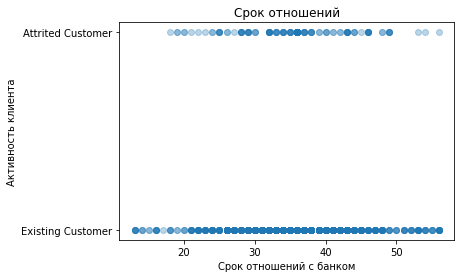

In [114]:
np.random.seed(42)

random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]["Months_on_book"], data.iloc[random_subset]["Attrition_Flag"], alpha = .3)
plt.xlabel("Срок отношений с банком")
plt.ylabel("Активность клиента")
plt.title("Срок отношений")
pass

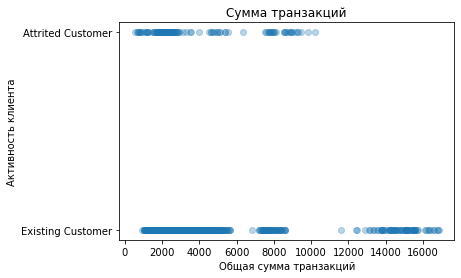

In [115]:
plt.scatter(data.iloc[random_subset]["Total_Trans_Amt"], data.iloc[random_subset]["Attrition_Flag"], alpha = .3)
plt.xlabel("Общая сумма транзакций")
plt.ylabel("Активность клиента")
plt.title("Сумма транзакций")
pass

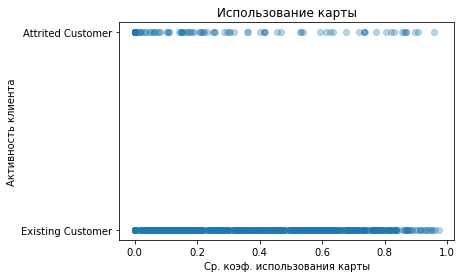

In [116]:
plt.scatter(data.iloc[random_subset]["Avg_Utilization_Ratio"], data.iloc[random_subset]["Attrition_Flag"], alpha = .3)
plt.xlabel("Ср. коэф. использования карты")
plt.ylabel("Активность клиента")
plt.title("Использование карты")
pass

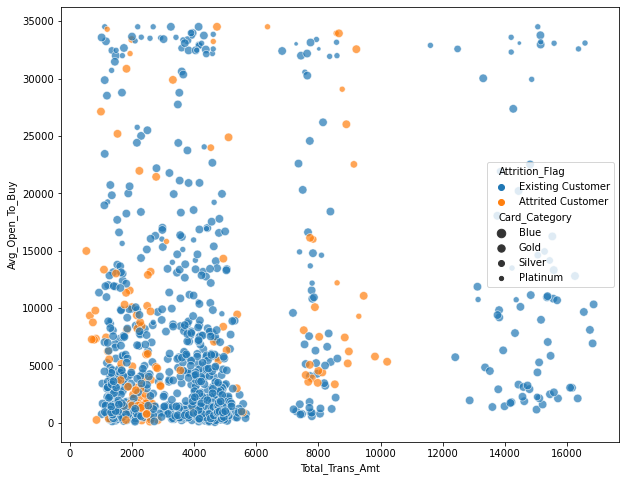

In [117]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x="Total_Trans_Amt", y="Avg_Open_To_Buy", size="Card_Category", hue="Attrition_Flag", data=data.iloc[random_subset], alpha=0.7)
pass

По диаграммам рассеивания, видно, что у уходящих клиентов показатели ниже, чем у активных

<h2>Матрица корреляции</h2>

Вычисление матрицы корреляции для обучающей выборки

<strong>Используется print, потому что на githib.com,  таблица отображется не правильно!</strong>

In [118]:
corr_mat = X_train.corr()
print(corr_mat)

                          Customer_Age    Gender  Dependent_count  \
Customer_Age                  1.000000  0.019416        -0.118558   
Gender                        0.019416  1.000000         0.002260   
Dependent_count              -0.118558  0.002260         1.000000   
Months_on_book                0.789204  0.004708        -0.100702   
Total_Relationship_Count     -0.008110 -0.016881        -0.049020   
Months_Inactive_12_mon        0.054819  0.002449        -0.006822   
Contacts_Count_12_mon        -0.025042 -0.036277        -0.049691   
Credit_Limit                  0.005058 -0.417851         0.062603   
Total_Revolving_Bal           0.017323 -0.025327        -0.006283   
Avg_Open_To_Buy               0.003512 -0.415359         0.063127   
Total_Amt_Chng_Q4_Q1         -0.053763 -0.028241        -0.043500   
Total_Trans_Amt              -0.041325 -0.020750         0.028911   
Total_Trans_Ct               -0.061511  0.067352         0.056400   
Total_Ct_Chng_Q4_Q1          -0.00

<p>Визуализируем матрицу корреляции</p>

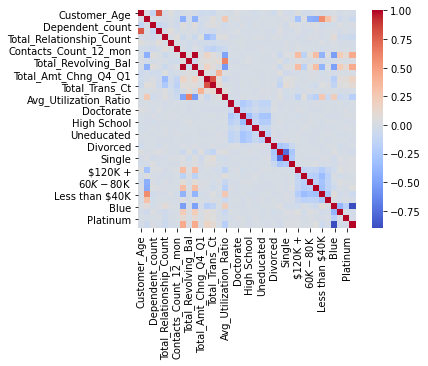

In [119]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

<strong>Используется print, потому что на githib.com,  таблица отображется не правильно!</strong>

In [120]:
print(corr_mat > 0.5)

                          Customer_Age  Gender  Dependent_count  \
Customer_Age                      True   False            False   
Gender                           False    True            False   
Dependent_count                  False   False             True   
Months_on_book                    True   False            False   
Total_Relationship_Count         False   False            False   
Months_Inactive_12_mon           False   False            False   
Contacts_Count_12_mon            False   False            False   
Credit_Limit                     False   False            False   
Total_Revolving_Bal              False   False            False   
Avg_Open_To_Buy                  False   False            False   
Total_Amt_Chng_Q4_Q1             False   False            False   
Total_Trans_Amt                  False   False            False   
Total_Trans_Ct                   False   False            False   
Total_Ct_Chng_Q4_Q1              False   False            Fals

In [121]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

Credit_Limit         Avg_Open_To_Buy          0.996029
Total_Trans_Amt      Total_Trans_Ct           0.807787
Customer_Age         Months_on_book           0.789204
Total_Revolving_Bal  Avg_Utilization_Ratio    0.622711
Gender               Less than $40K           0.578902
dtype: float64

<h2>Нормализация количественных признаков</h2>
<p>Алгоритм <strong>метода ближайших соседей</strong> чувствителен к масштабированию данных.</p>
<p>Поскольку у количественных признаков схожий физический смысл, в нашем случае не нужна нормализация признаков.</p>

<h2>Обучение модели (метод ближайших соседов)</h2>

<strong>Реализация функций обучения модели и вывода результатов</strong>

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def fitKnn(n):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

def printKnnResult():
    count = 0
    for value in y_test_predict:
        if value == 1:
            count = count + 1
    print("Общее количество клиентов - ", y_test_predict.size)
    print("Количество уходящих клиентов - ", count)
    
def printError():
    err_test  = np.mean(y_test  != y_test_predict)
    print("Ошибка -", err_test)
    print("Матрица рассогласования:")
    print(confusion_matrix(y_test, y_test_predict))

<strong>Количество соседей = 2</strong>

In [123]:
y_test_predict = fitKnn(2)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  230
Ошибка - 0.11571879936808847
Матрица рассогласования:
[[2068   59]
 [ 234  171]]


<strong>Количество соседей = 9</strong>

In [124]:
y_test_predict = fitKnn(9)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  317
Ошибка - 0.10979462875197472
Матрица рассогласования:
[[2032   95]
 [ 183  222]]


<strong>Количество соседей = 16</strong>

In [125]:
y_test_predict = fitKnn(16)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  282
Ошибка - 0.1141390205371248
Матрица рассогласования:
[[2044   83]
 [ 206  199]]


<strong>Количество соседей = 21</strong>

In [126]:
y_test_predict = fitKnn(21)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  300
Ошибка - 0.11255924170616113
Матрица рассогласования:
[[2037   90]
 [ 195  210]]


<h4>Вывод на основе матриц рассогласования</h4>
<p>Обучение модели проведено 4 раза с разным количеством <strong>соседей</strong>.</p>
<p>Наименьшее количество ошибок 1 рода и наибольшее количество ошибок 2 рода содержится в модели с 2 <strong>соседями</strong>.</p>
<p>Наибольшее количество ошибок 1 рода и наименьшее количество ошибок 2 рода содержится в модели с 9 <strong>соседями</strong>.</p>

<h2>Запуск других классификаторов, сравнение результатов</h2>

<h3>Полносвязные (неглубокие) нейронные сети</h3>

<strong>Использование 1 слоя</strong>

In [127]:
from sklearn.neural_network import MLPClassifier

test_err = []
train_err = []
hidden_layer = np.arange(1, 30)

for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), random_state = 42, max_iter = 10000)
    mlp_model.fit(X_train, y_train)
    
    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_predict))
    test_err.append(np.mean(y_test != y_test_predict))

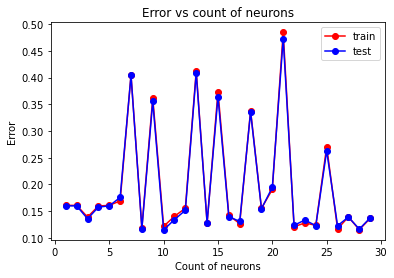

In [128]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs count of neurons')
plt.xlabel('Count of neurons')
plt.ylabel('Error')
plt.legend()
pass

In [129]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.11533903884134299 0.11492890995260663


In [131]:
neu_opt = hidden_layer[test_err == min_test_err]
print(neu_opt)

[10]


Наименьшая ошибка на тестовой выборке достигается при 10 нейронах.

<strong>Добавление 2 слоя и нахождение оптимального количества нейронов</strong>

In [132]:
test_err = []
train_err = []
hidden_layer = np.arange(1, 30)

for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (10, neu), random_state = 42, max_iter = 10000)
    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_predict))
    test_err.append(np.mean(y_test != y_test_predict))

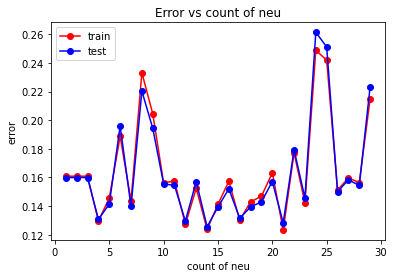

In [133]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs count of neu')
plt.xlabel('count of neu')
plt.ylabel('error')
plt.legend()
pass

In [134]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.12337063857801185 0.12559241706161137


In [135]:
neu_opt = hidden_layer[test_err == min_test_err]
print(neu_opt)

[14]


Наименьшая ошибка на тестовой выборке достигается при 14 нейронах.

<strong>Нахождение оптимального значения параметра alpha</strong>

In [136]:
from sklearn.metrics import accuracy_score

alpha_arr = np.arange(0.0001, 0.01, 0.001)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (14, 1), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=10000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_predict))
    test_err.append(np.mean(y_test != y_test_predict))
    train_acc.append(accuracy_score(y_train, y_train_predict))
    test_acc.append(accuracy_score(y_test, y_test_predict))

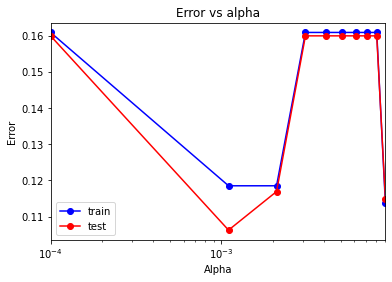

In [137]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

In [138]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.11375905200789993 0.10624012638230648


In [139]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.0011]


In [140]:
print("Оптимальное значение параметра alpha - 0.0011")
print("Ошибка - 0.10624012638230648")

Оптимальное значение параметра alpha - 0.0011
Ошибка - 0.10624012638230648


<h3>Вывод по применению полносвязных нейронных сетей</h3>

В данном разделе были изучены и применены для обучения модели полносвязные (неглубокие) нейронные сети. На основе результатов применения обучения можно сделать вывод, что полносвязные нейронные сети показывают очень хорошие результаты. При более глубоком их изучении можно добиться еще более лучших результатов.

<h3>Машина опорных векторов (SVC)</h3>

In [141]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [142]:
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.00013166556945358788 0.15995260663507108


<h3>Случайный лес (Random Forest)</h3>

In [143]:
from sklearn.ensemble import RandomForestClassifier

test_err = []
train_err = []
depth = np.arange(1, 30)

for dep in depth:
    rand_forest_model = RandomForestClassifier(max_depth = dep)
    rand_forest_model.fit(X_train, y_train)

    y_train_predict = rand_forest_model.predict(X_train)
    y_test_predict = rand_forest_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_predict))
    test_err.append(np.mean(y_test != y_test_predict))

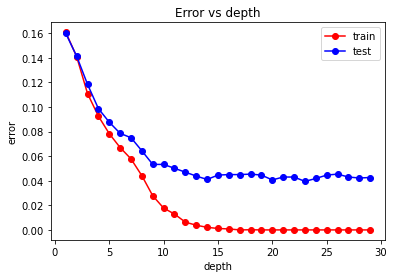

In [144]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs depth')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()

pass

In [145]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err, min_test_err)

0.0 0.03949447077409163


In [146]:
neu_opt = hidden_layer[test_err == min_test_err]

print(neu_opt)

[23]


Наименьшее значение ошибки - 0.039, при максимальной глубине дерева, равной значению 23.

In [147]:
from sklearn.tree import DecisionTreeClassifier

test_err = []
train_err = []
depth = np.arange(1, 30)

for dep in depth:
    tree_model = DecisionTreeClassifier(max_depth = dep)
    tree_model.fit(X_train, y_train)

    y_train_predict = tree_model.predict(X_train)
    y_test_predict = tree_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_predict))
    test_err.append(np.mean(y_test != y_test_predict))

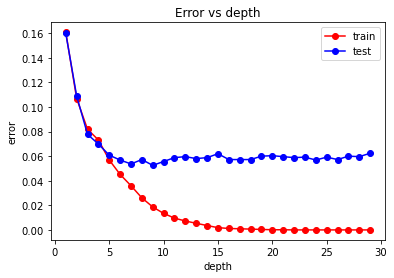

In [148]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs depth')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()

pass

In [149]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err, min_test_err)

0.0 0.05252764612954187


In [150]:
dep_opt = depth[test_err == min_test_err]

print(dep_opt)

[9]


Наименьшее значение ошибки - 0.05, при максимальной глубине дерева,равной значению 9.

<h3>Выводы по запуску различных классификаторов</h3>

Были изучены и применены различные классификаторы для обучения модели.
<ol>
    <li>Метод ближайших соседей</li>
    <li>Полносвязные нейронные сети</li>
    <li>Машина опорных векторов</li>
    <li>Случайный лес</li>
    <li>Деревья решений</li>
</ol>
Наилучший результат показал классификатор <strong>Случайный лес</strong>. У него наименьшая ошибка - 0.039. 
Хочется отдельно отметить, что при применении метода ближайших соседей проводился подбор оптимального количества соседей.

<h2>Борьба с несбалансированностью классов</h2>

In [151]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Для баланса необходимо удалить из таблицы 6873 строки со значением Existing Customer.

In [152]:
data_balance = data

n = 6873

data_balance = data_balance.drop(data_balance.loc[data_balance['Attrition_Flag'] == 'Existing Customer'].sample(n=n).index)
data_balance

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
12,710599683,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,...,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
20,806165208,Existing Customer,47,M,1,Doctorate,Divorced,$60K - $80K,Blue,42,...,2,0,20979.0,1800,19179.0,0.906,1178,27,0.929,0.086
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [153]:
data_balance['Attrition_Flag'].value_counts()

Existing Customer    1627
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Классы являются сбалансированными.

<h2>Исключение коррелированных переменных</h2>

Попробуем убрать следущие переменные из таблицы и посмотрим на результаты ниже:

In [154]:
X = data_noncategorial.drop(["CLIENTNUM", "Gender", "Credit_Limit", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Attrition_Flag"], axis=1)
y = data_noncategorial["Attrition_Flag"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

print(N_train, N_test)

7595 2532


In [155]:
y_test_predict = fitKnn(21)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  300
Ошибка - 0.10781990521327015
Матрица рассогласования:
[[2043   84]
 [ 189  216]]


Приведены ошибка и матрица рассогласования,на которых наглядно все видно. Результат не является одним из лучших. можно сделать вывод, что исключать нужно переменные, которые лучше корелируют с результатом.

<h2>Вывод</h2>

<p>Поставлена задача классификации с двумя классами для прогнозирования оттока клиентов банка.</p> 
<p>Представлена визуализация и описательная статистика для данных. Рассчитана матрица корреляции и представлена ее визуализация.</p>
<p>Проведена проверка пропущенных значений и обработка категориальных признаков. Для бинарных категориальных признаков использован метод бинаризации, а для не бинарных категориальных признаков использован метод векторизации.</p> 
<p>Приведена причина по которой не используется нормализация количественных признаков.</p> 
<p>Проведено разбиение данных на обучающую и тестовую выборки.</p> 
<p>Для обучения модели используется <strong>метод k-ближайших соседей</strong>. Проведены опыты с разным количеством <strong>соседей</strong>. Можно сделать вывод - чем большее количество <strong>соседей</strong> используется при обучении модели, тем лучшие результаты показывает предсказание.</p>
<p>Применены и другие классификаторы для обучения модели. Классификатор <strong>Случайный лес</strong> показал наилучшие результаты.</p>
<p>Так же поборолись с несбалансированностью классов и поэксперементировали с исключением корреляционных переменных.</p>